<a href="https://colab.research.google.com/github/RafaelSotero-dev/Machine-Learning/blob/main/MultiLinearNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.distributions.uniform as urand
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

class MultiLinearNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        return self.layers(x)


In [4]:
class AlgebricDataSet(Dataset):
    def __init__(self, f, intervalo, nsamples):
        super().__init__()
        X = urand.Uniform(intervalo[0], intervalo[1]).sample([nsamples])
        self.data = [(x, f(x)) for x in X]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

In [5]:
from math import sin
sinfunc = lambda x: sin(x/2)
intervalo = (-24, 36)
train_samples = 1000
test_samples = 100

train_dataset = AlgebricDataSet(sinfunc, intervalo, train_samples)
test_dataset = AlgebricDataSet(sinfunc, intervalo, test_samples)

train_dataloader = DataLoader(train_dataset, batch_size=train_samples, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=test_samples, shuffle=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

model = MultiLinearNetwork().to(device)

cpu


In [6]:
criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

def plot_comparetion(f, model, intervalo=(-10, 10), nsamples=10):
    samples = np.linspace(intervalo[0], intervalo[1], 10)
    model.eval()
    with torch.no_grad():
        p = model(torch.tensor(samples).unsqueeze(1).float().to(device))
        plt.plot(samples, list(map(f, samples)), 'o')
        plt.plot(samples, p.cpu(), 'b')
        plt.show()

In [1]:
def train(model, criterion, optimizer, train_dataloader, epoch):
    custo_train = 0.0
    model.train()

    for X,y in train_dataloader:
        X = X.unsqueeze(1).float().to(device)
        y = y.unsqueeze(1).float().to(device)

        pred = model(X)

        loss = criterion(pred, y)
        lista_custos.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        
        custo_train += loss.item()
        optimizer.step()

    return custo_train / len(train_dataloader)


def test(model, test_dataloader):
    custo_test = 0.0
    model.eval()

    with torch.no_grad():

        for X,y in test_dataloader:
            X = X.unsqueeze(1).float().to(device)
            y = y.unsqueeze(1).float().to(device)

            pred = model(X)

            loss = criterion(pred, y)

            custo_test += loss.item()

    return custo_test / len(test_dataloader)

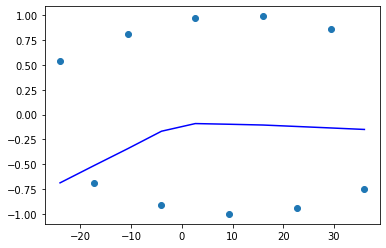

##############################


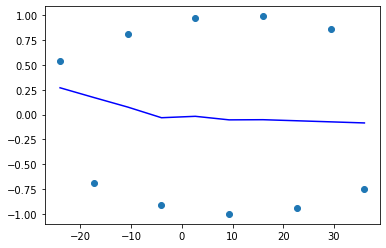

##############################


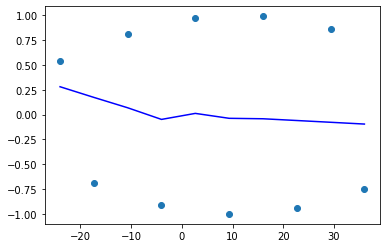

##############################


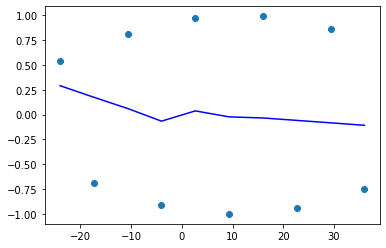

##############################


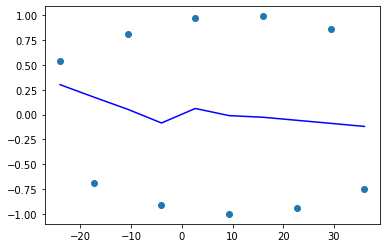

##############################


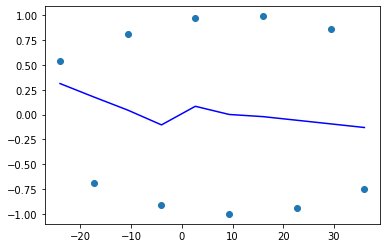

##############################


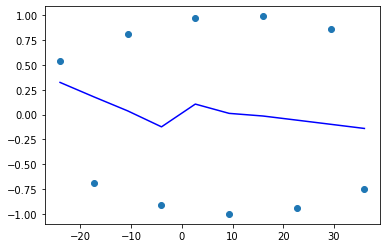

##############################


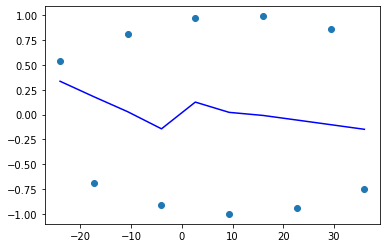

##############################


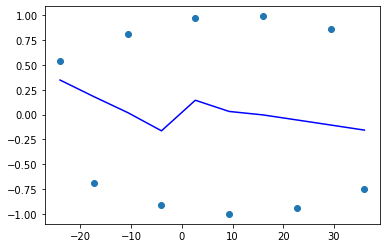

##############################


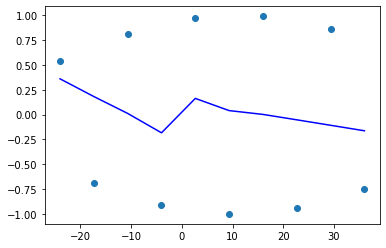

##############################


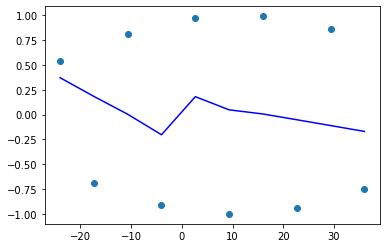

##############################


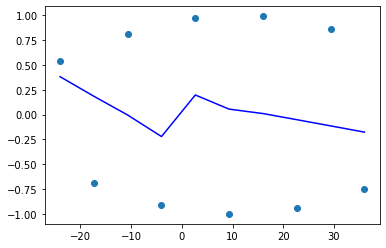

##############################


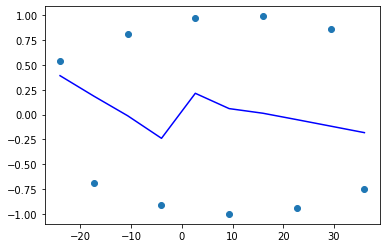

##############################


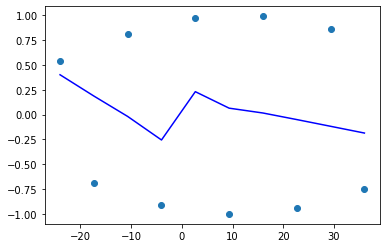

##############################


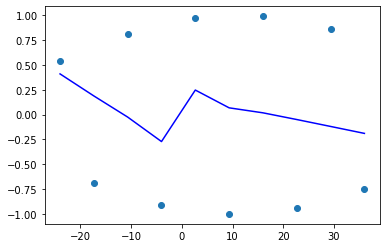

##############################


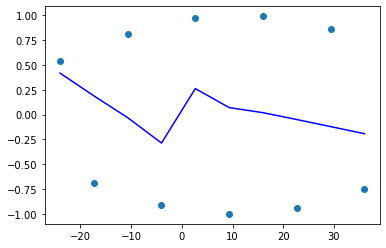

##############################


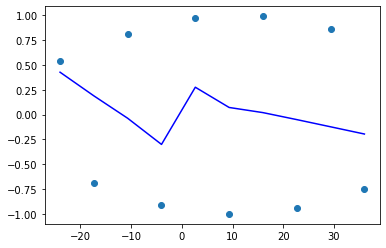

##############################


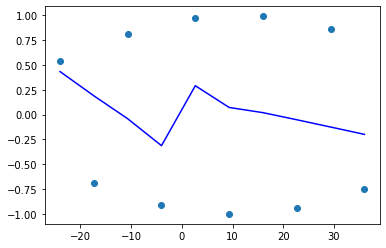

##############################


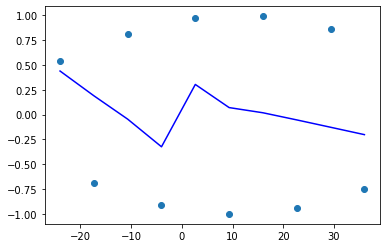

##############################


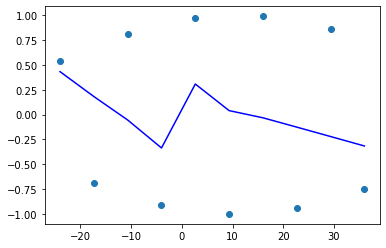

##############################


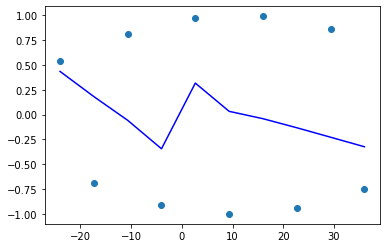

##############################


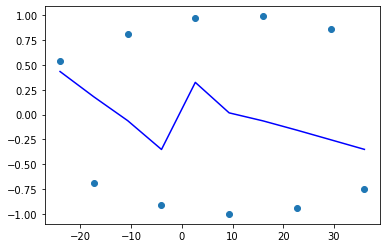

##############################


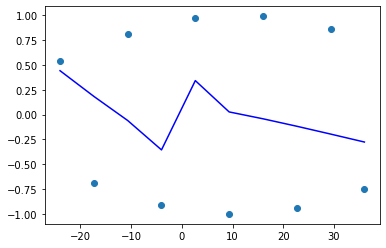

##############################


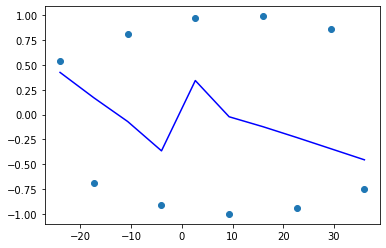

##############################


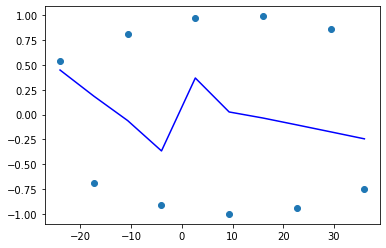

##############################


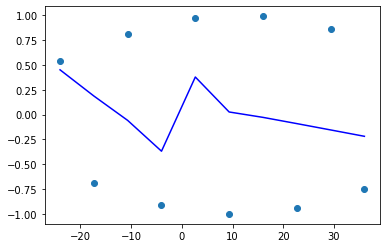

##############################


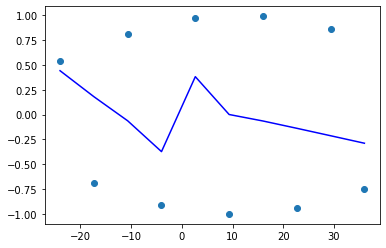

##############################


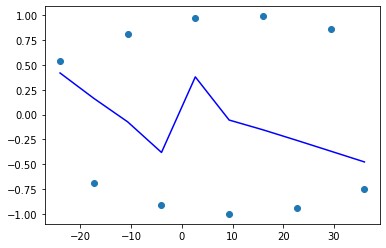

##############################


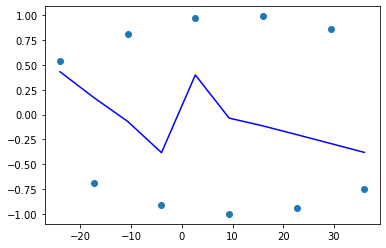

##############################


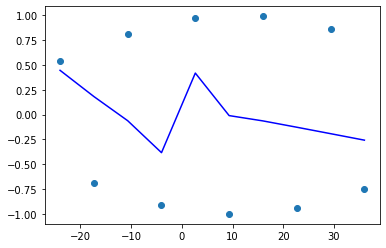

##############################


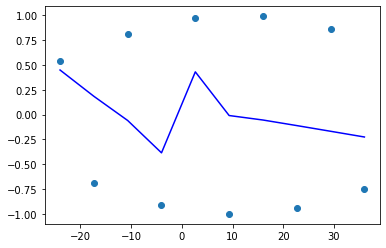

##############################


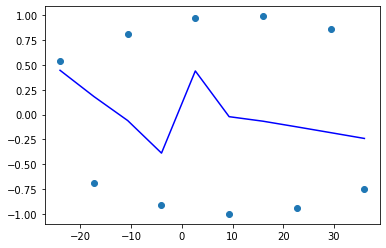

##############################


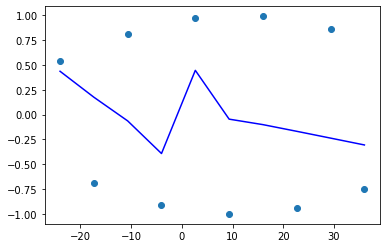

##############################


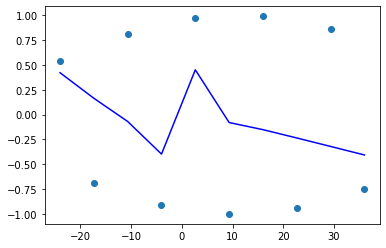

##############################


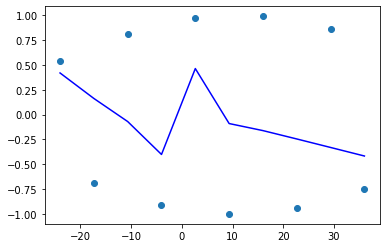

##############################


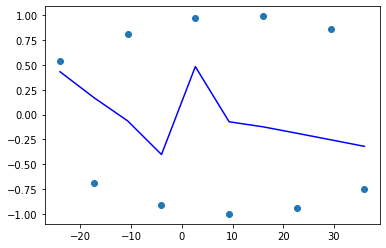

##############################


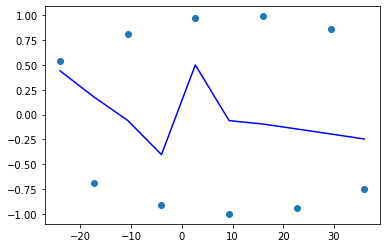

##############################


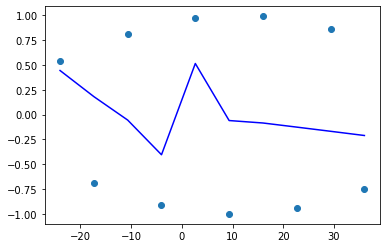

##############################


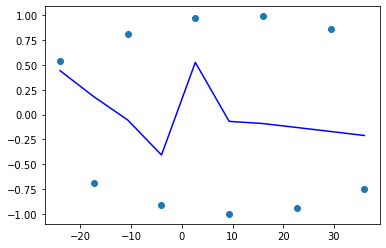

##############################


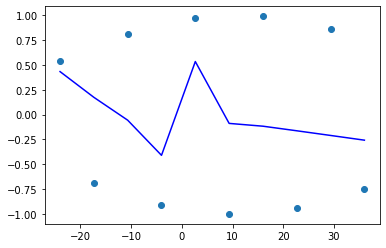

##############################


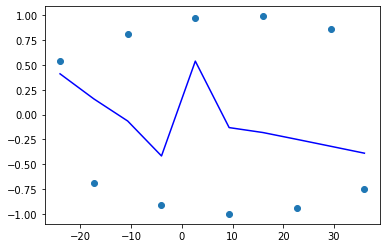

##############################


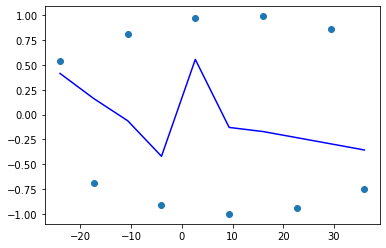

##############################


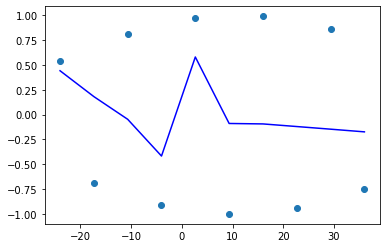

##############################


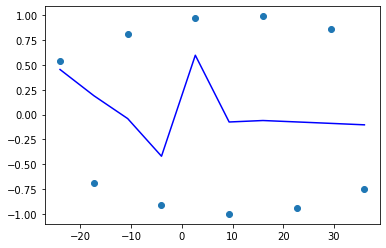

##############################


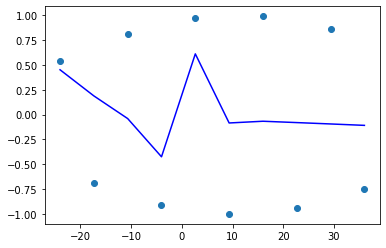

##############################


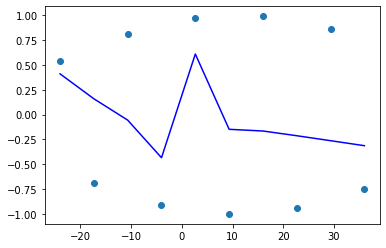

##############################


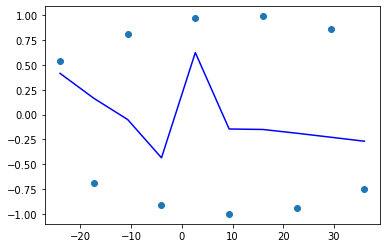

##############################


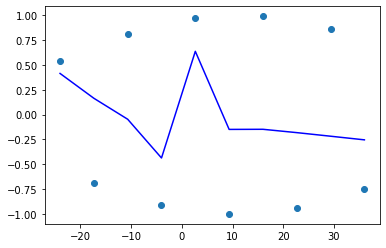

##############################


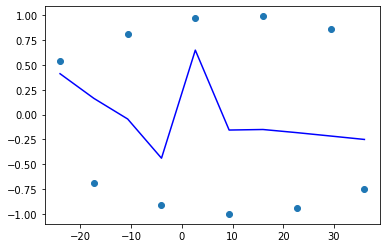

##############################


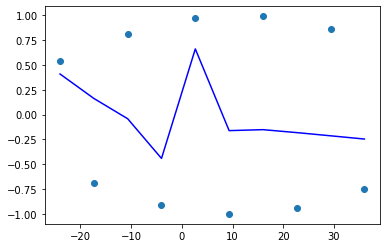

##############################


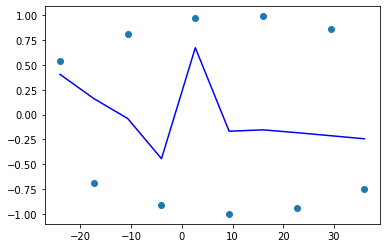

##############################


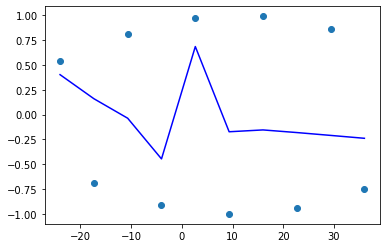

##############################


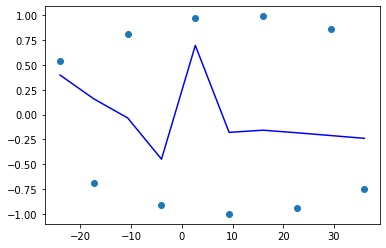

##############################


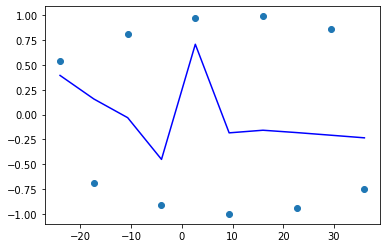

##############################


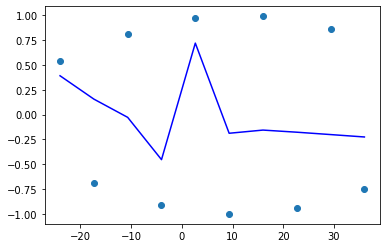

##############################


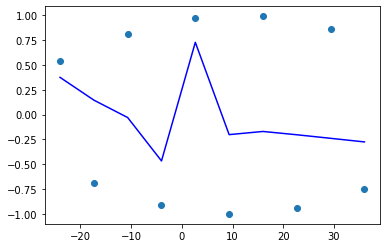

##############################


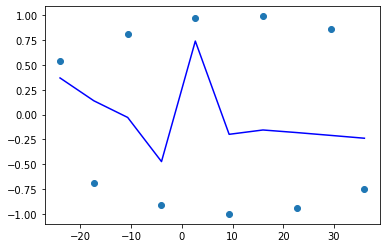

##############################


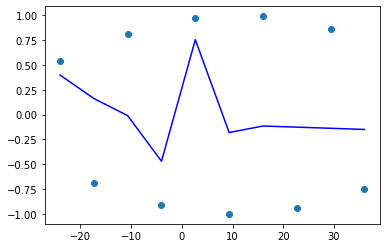

##############################


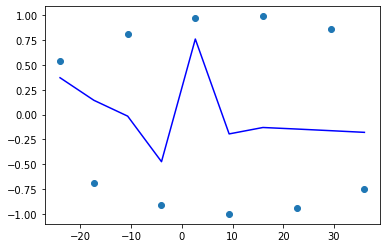

##############################


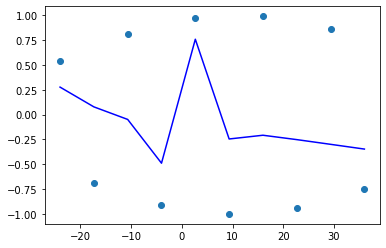

##############################


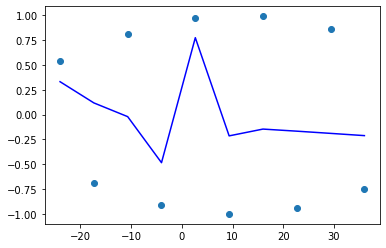

##############################


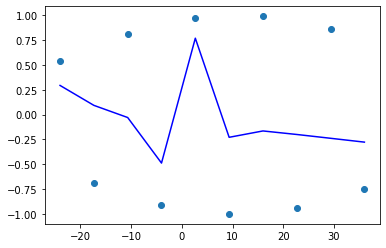

##############################


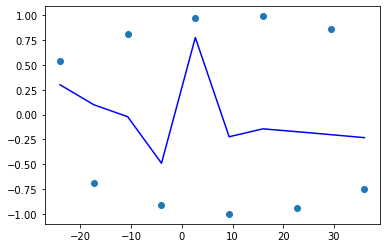

##############################


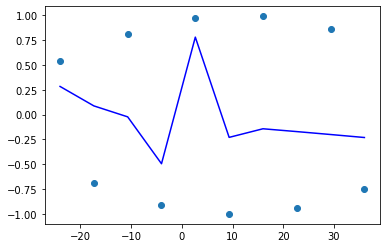

##############################


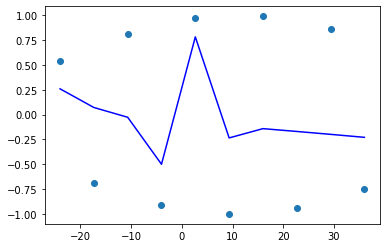

##############################


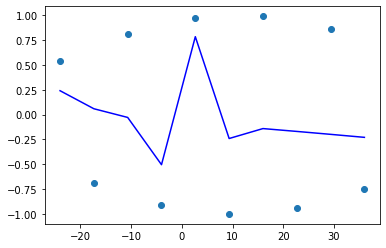

##############################


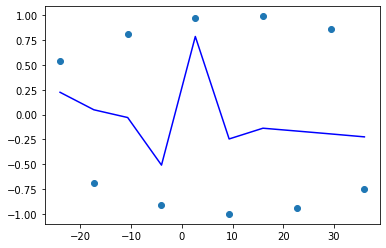

##############################


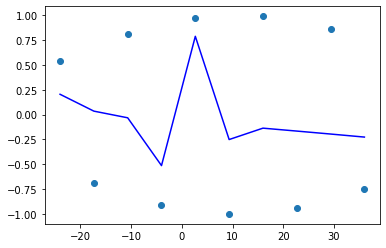

##############################


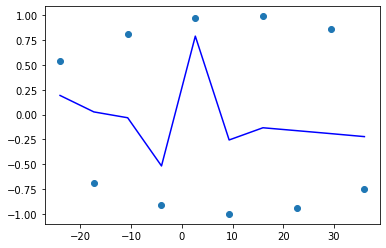

##############################


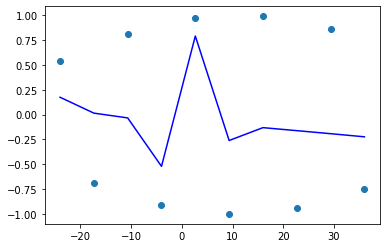

##############################


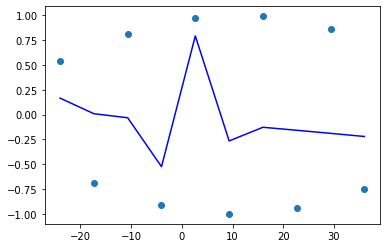

##############################


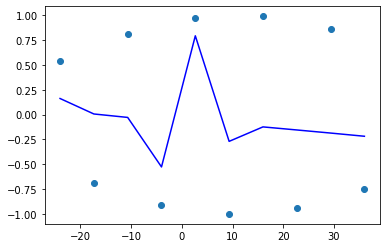

##############################


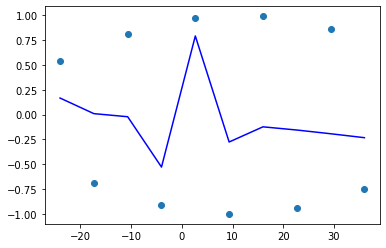

##############################


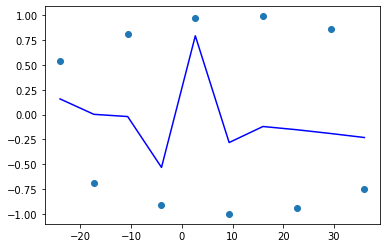

##############################


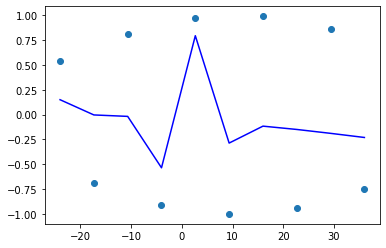

##############################


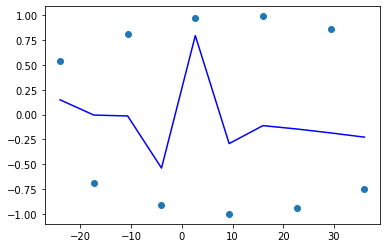

##############################


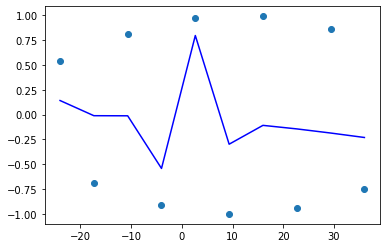

##############################


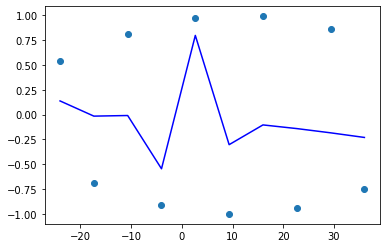

##############################


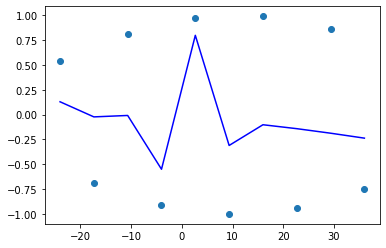

##############################


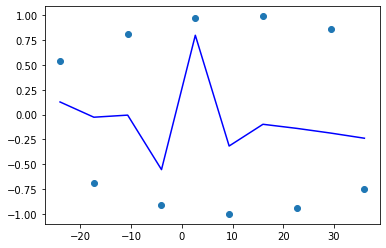

##############################


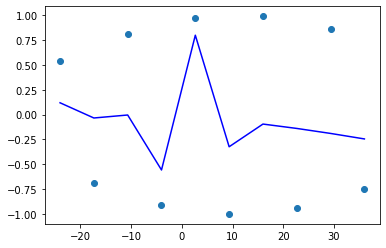

##############################


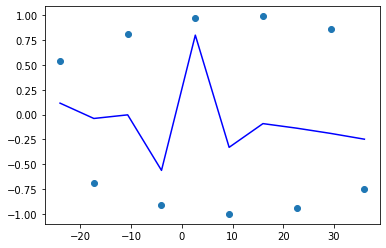

##############################


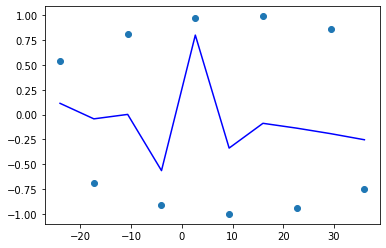

##############################


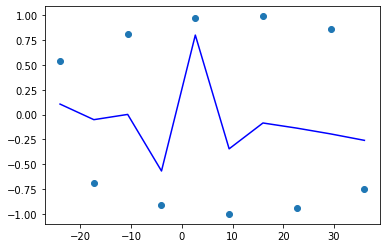

##############################


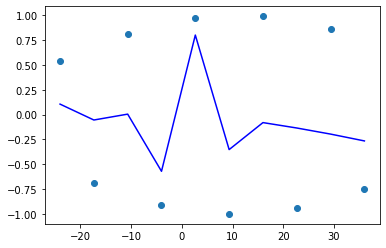

##############################


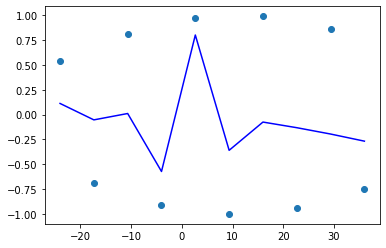

##############################


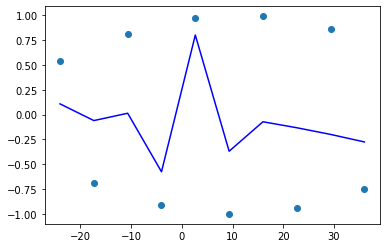

##############################


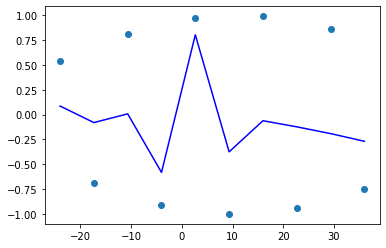

##############################


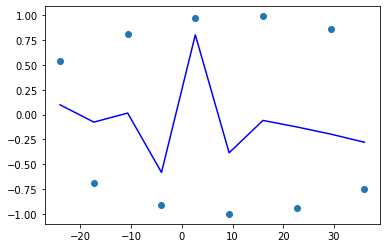

##############################


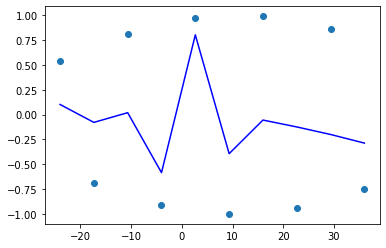

##############################


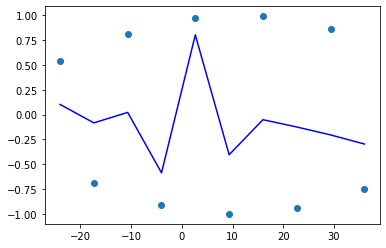

##############################


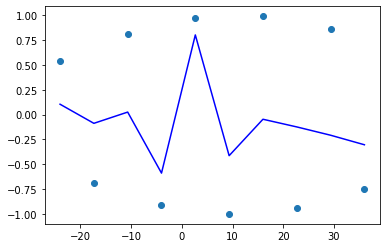

##############################


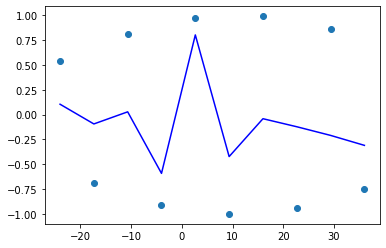

##############################


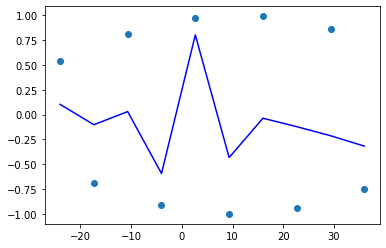

##############################


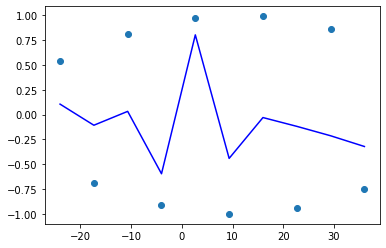

##############################


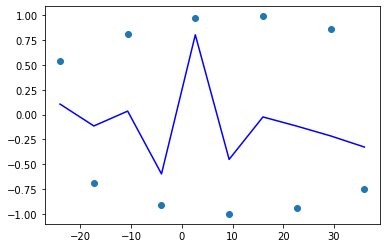

##############################


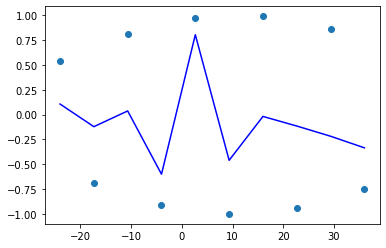

##############################


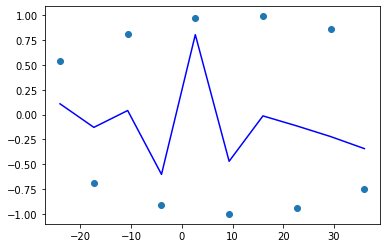

##############################


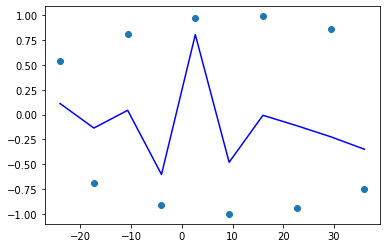

##############################


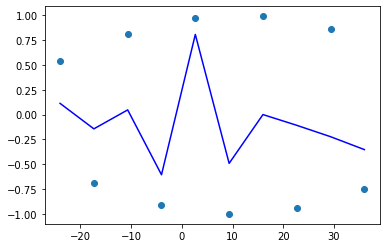

##############################


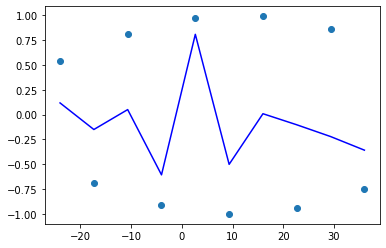

##############################


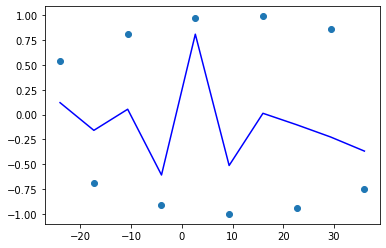

##############################


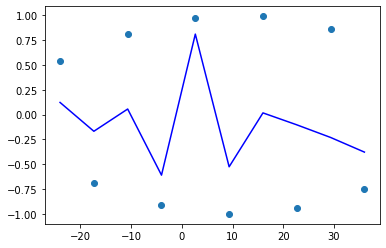

##############################


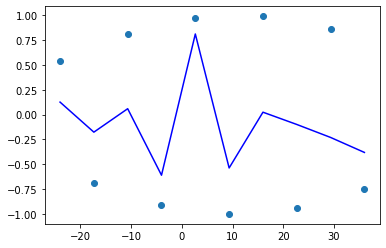

##############################


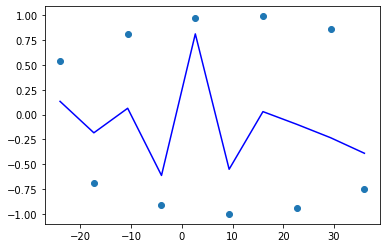

##############################


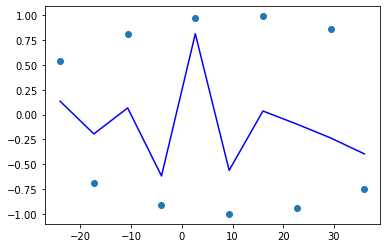

##############################


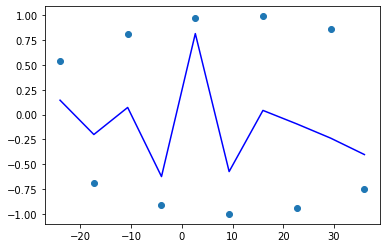

##############################


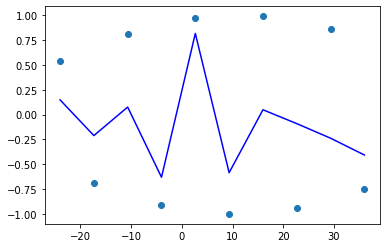

##############################


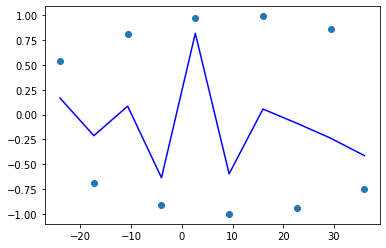

##############################


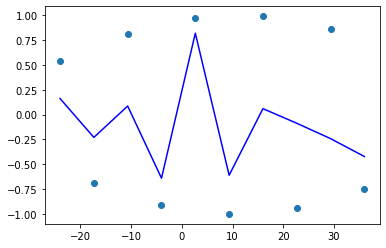

##############################


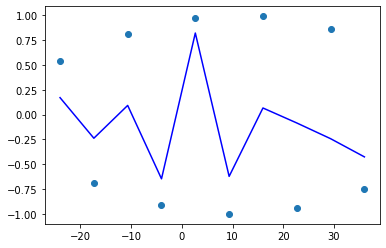

##############################


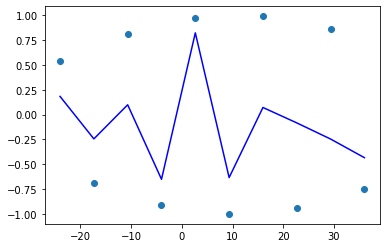

##############################


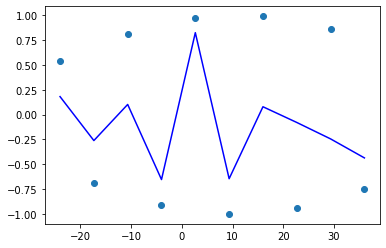

##############################


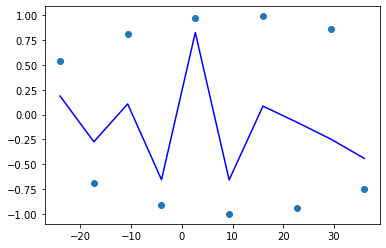

##############################


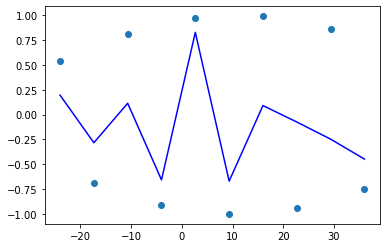

##############################


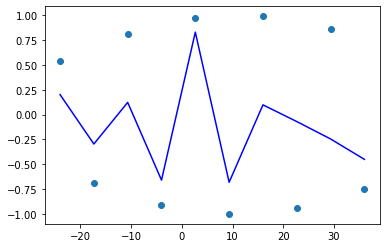

##############################


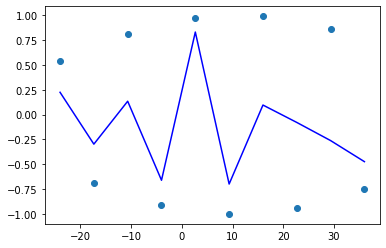

##############################


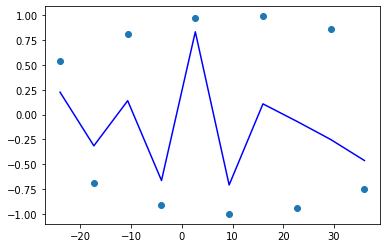

##############################


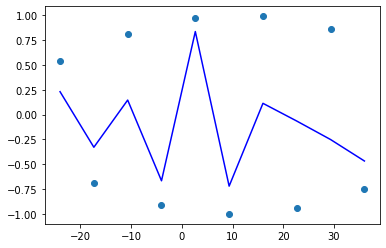

##############################


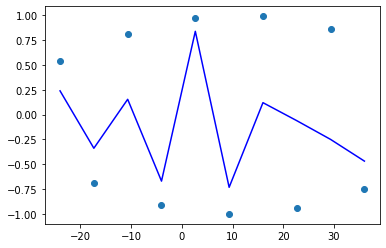

##############################


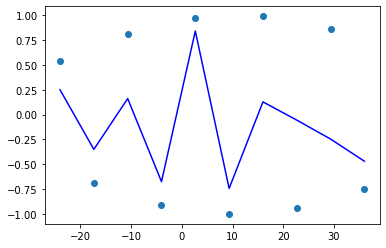

##############################


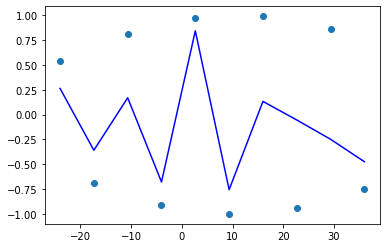

##############################


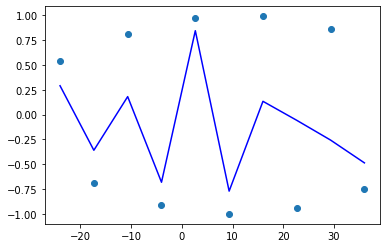

##############################


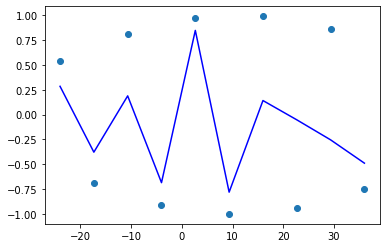

##############################


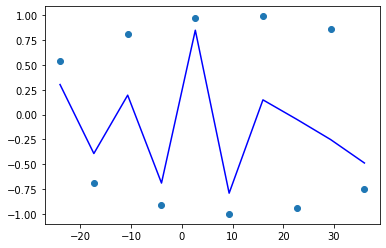

##############################


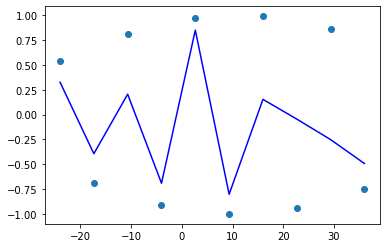

##############################


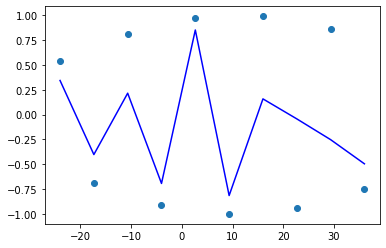

##############################


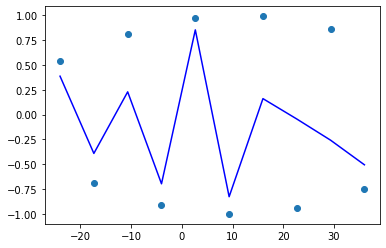

##############################


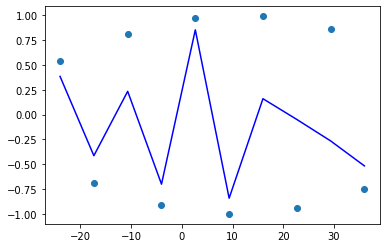

##############################


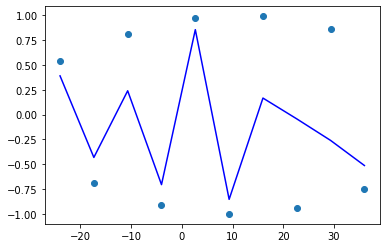

##############################


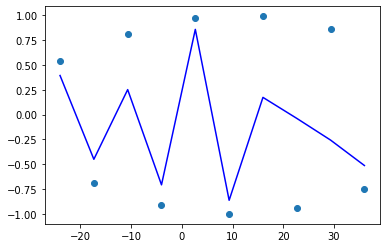

##############################


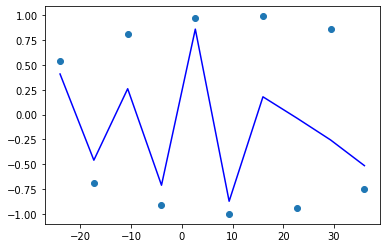

##############################


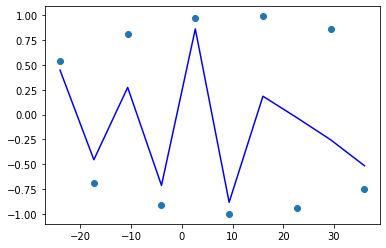

##############################


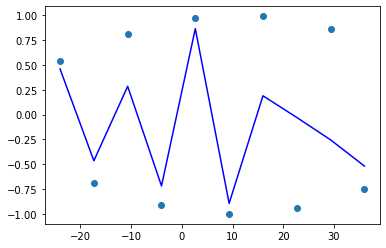

##############################


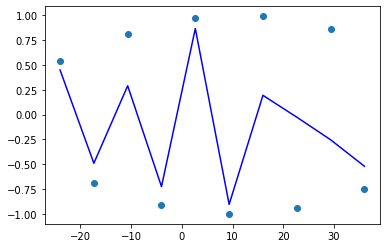

##############################


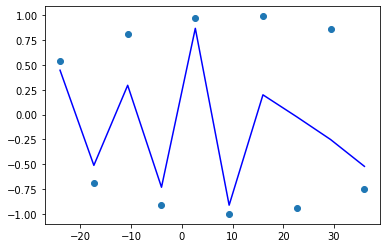

##############################


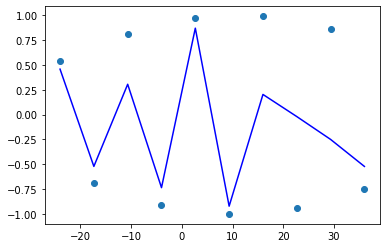

##############################


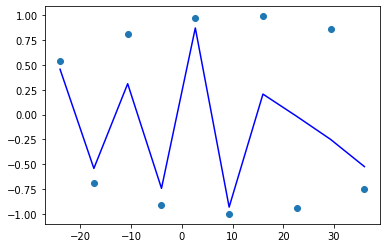

##############################


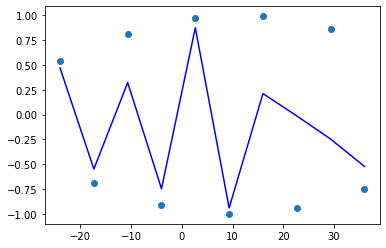

##############################


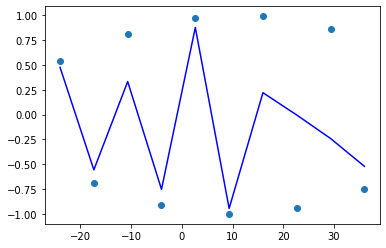

##############################


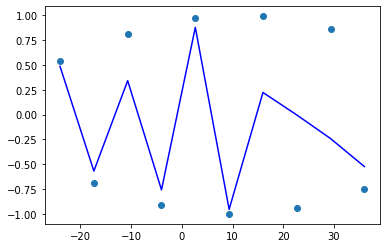

##############################


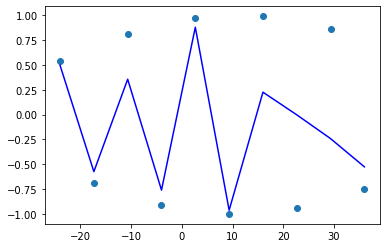

##############################


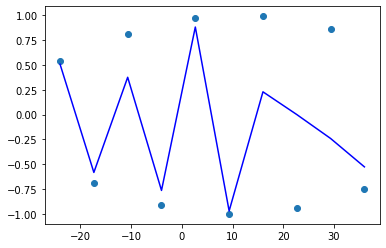

##############################


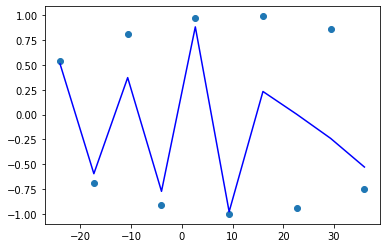

##############################


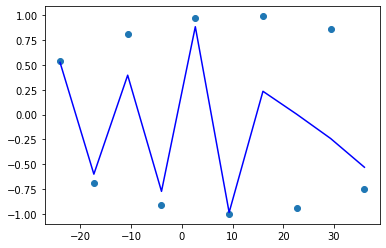

##############################


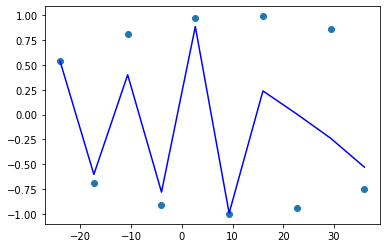

##############################


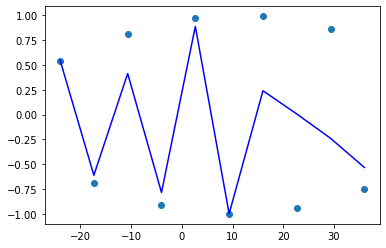

##############################


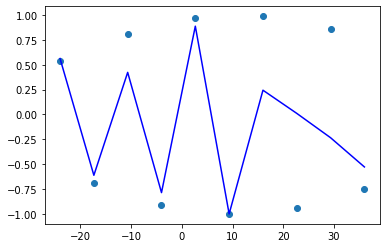

##############################


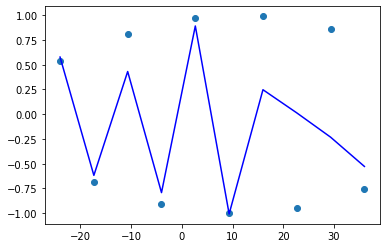

##############################


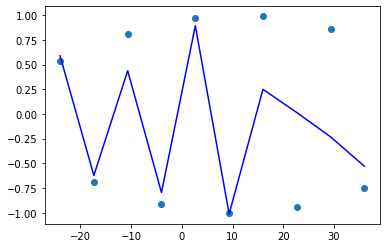

##############################


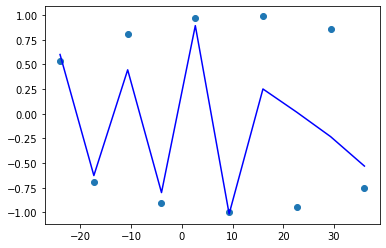

##############################


In [12]:
lista_custos = []
lista_custos_test = []
epochs = 30001
for t in range(epochs):
    result = train(model, criterion, optimizer, train_dataloader, t)
    lista_custos.append(result)
    if t % 200 == 0:
        plot_comparetion(sinfunc, model, intervalo, nsamples=40)
        print('#'*30)

    result_test = test(model, test_dataloader)
    lista_custos_test.append(result_test)



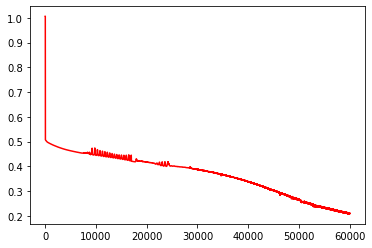

In [13]:
plt.plot(lista_custos,'r')
plt.show()

In [14]:
for X, y in test_dataloader:
    X = X.unsqueeze(1).float().to(device)
    y = y.unsqueeze(1).float().to(device)

    pred = model(X)

    result = r2_score(y, pred.detach().numpy())
    print(result)

0.5671676786431332
